# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [13]:
# Code here
#Filtered data to only include passengers. Did this by mapping classes of 1st, 2nd, and 3rd as passengers.
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

#Defining Filtered List
df_titanic_passenger = df_titanic[df_titanic["type"] == "passenger"]

#Creating joint dist (cross-tab) between passenger class and embarked
joint_passenger = pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"], margins = True)
joint_passenger

embarked,B,C,Q,S,All
class,,,,,
1st,3,143,3,175,324
2nd,6,26,7,245,284
3rd,0,102,113,494,709
All,9,271,123,914,1317


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?\
**According to 'conditional_distributions2, 69.6756% of 3rd Class passengers embarked at Southampton.**
* What proportion of Southampton passengers were in 3rd class?\
**According to 'conditional_distributions1, 54.0481% of Southampton passengers were in 3rd class.**

In [26]:
# Code here

#Conditional Dist of class given where passengers embarked
conditional_distributions1 = joint_passenger.div(joint_passenger.loc["All"], axis=1)
conditional_distributions1 = conditional_distributions1.drop(index="All", columns="All") #Remove all column as it is the total
print(conditional_distributions1)

#Conditional distribution of where passengers embarked given their class
conditional_distributions2 = joint_passenger.div(joint_passenger["All"], axis=0)
conditional_distributions2 = conditional_distributions2.drop(index="All", columns="All") #Remove all column as it is the total
print(conditional_distributions2)

embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

**I created two relative frequency bar charts to compare the distribution of class given where a passenger embarked, and vise versa.**

* **Pros:** \
*-This is beneficial if you are curious about the distribution of one variable given you have information about the other. For example, if I wanted to know which city was the most likely to have a 3rd class passenger, I could use these visuals. This is the same thing that is being done* \
*-It's also nice to compare different classes and embarking points with regards to relative frequency, as the bars are all the same height* 
* **Cons:** \
*-These graphics make it more difficult to make comparisons with regards to the actual counts of individuals for any one variable. For example, I see that, proportionally speaking, 2nd class had the most passengers embarking from Southampton, but there were more 3rd class passengers (494) in Southampton than 2nd class passengers (245)* \
*-For this reason, the original cross tab would be more helpful than these graphics when answering questions about the sheer amount of people for a certain variable*


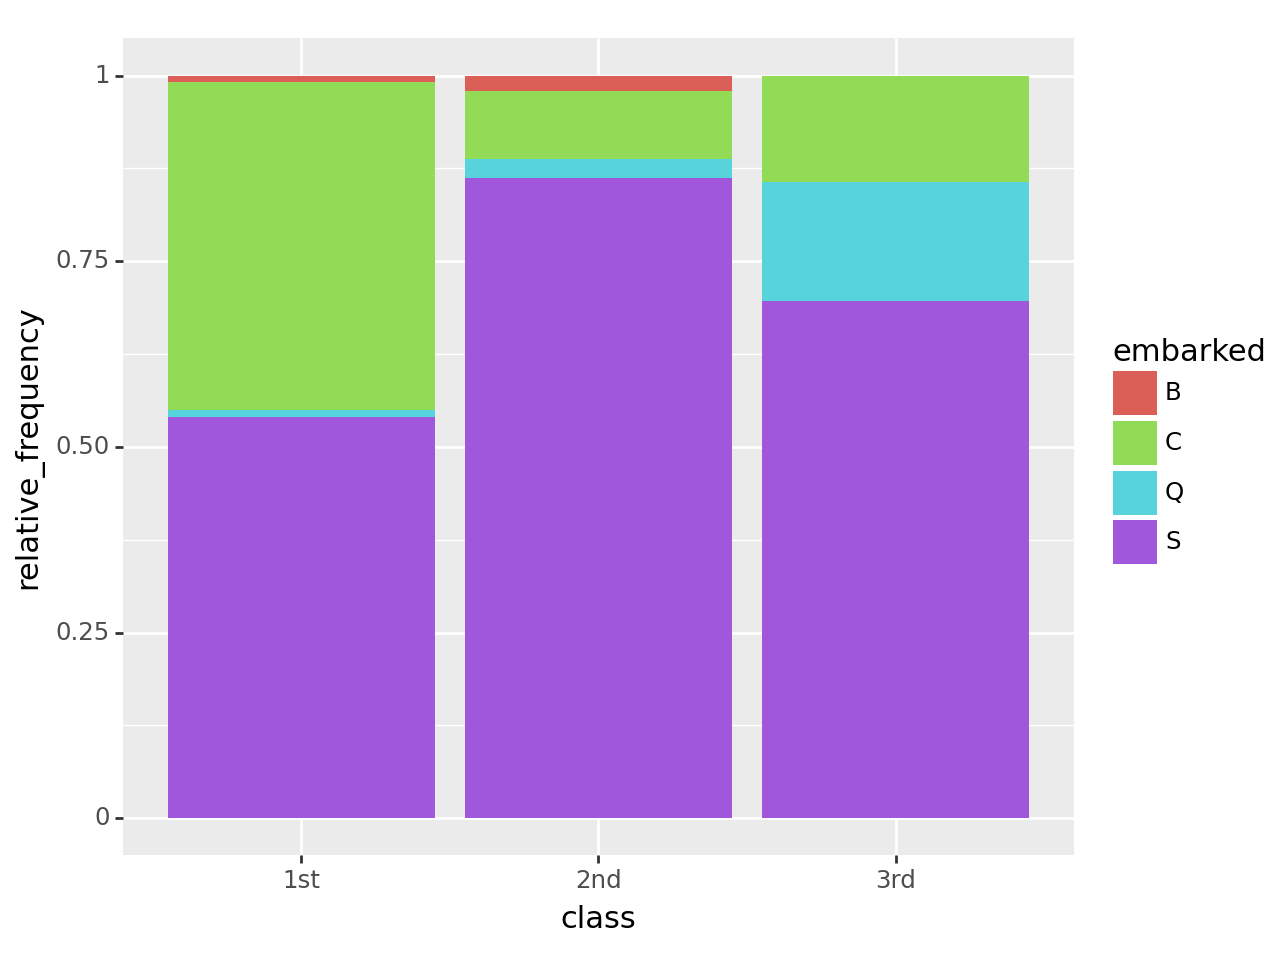

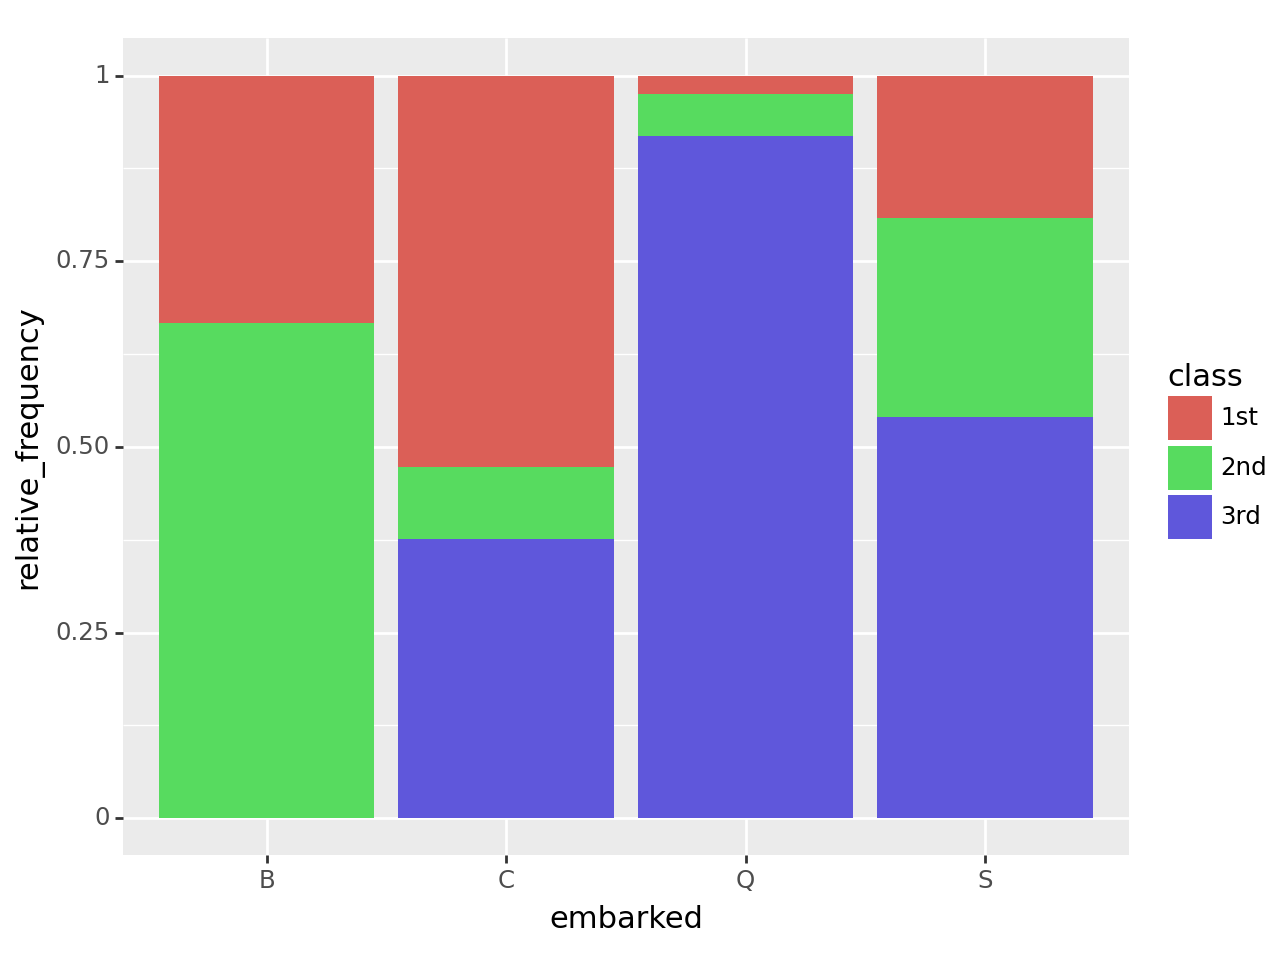

In [39]:
# Code here

import pandas as pd
from plotnine import *

df_relative_freq1 = (df_titanic_passenger
    .groupby(['class', 'embarked'])
    .size()
    .reset_index(name='count')
    .assign(relative_frequency=lambda x: x['count'] / x.groupby('class')['count'].transform('sum'))
)


plot1 = (ggplot(df_relative_freq1, aes(x="class", y="relative_frequency", fill="embarked"))
 + geom_bar(stat="identity")
)

df_relative_freq2 = (df_titanic_passenger
    .groupby(['embarked', 'class'])
    .size()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x / x.sum())
    .reset_index(name='relative_frequency')
)

# Create the bar plot for class distribution among embarked locations
plot2 = (ggplot(df_relative_freq2, aes(x="embarked", y="relative_frequency", fill="class")) 
 + geom_bar(stat="identity", position="fill")
)

print(plot1)
print(plot2)